<a href="https://colab.research.google.com/github/anjunjin/PFE-ING3-IA/blob/master/Repr%C3%A9sentation_du_texte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Partie "commune"

In [ ]:
min_df = 10

In [ ]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')
DATA_PATH = "/content/drive/My Drive/PFE/"
data = pd.read_csv(DATA_PATH+"Tweets_nettoyés_210322.csv", encoding='utf-8').drop(['Unnamed: 0'], axis=1)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
# data = data.sample(n=20000, replace=False, random_state=42)

In [ ]:
data.shape

(722280, 10)

In [ ]:
# data.sort_values(by = 'cleaned').tail(100)

In [ ]:
data = data.dropna()

In [ ]:
# data.sort_values(by = 'cleaned').tail(100)

In [ ]:
data.shape

(721518, 10)

In [ ]:
!pip install scattertext

In [ ]:
import scattertext as st
"""import spacy
from spacy.tokenizer import Tokenizer
from spacy.lang.fr import French"""
import numpy as np
import math

In [ ]:
# spacy.cli.download('fr_core_news_md')

In [ ]:
# nlp = spacy.load("fr_core_news_md")

Besoin de cette ligne parce que certains tweets cleaned sont vides

In [ ]:
# data = data.drop(data[data.index.isin([35203, 35220, 111663, 111664, 111665, 111666, 111667, 142467, 247758, 249448, 458701, 545318, 545319, 548835, 549118, 550069, 584385, 584386, 584387, 596245, 596709, 596779, 634646, 663672, 663701, 663706, 700933])].index)

In [ ]:
# data

In [ ]:
"""mask = data.applymap(lambda x: x is None)
cols = data.columns[(mask).any()]
for col in data[cols]:
    data.loc[mask[col], col] = ''
data"""

"""test_list = list(data['cleaned'])
res = list(filter(None, test_list))
data['cleaned'] = pd.DataFrame(res)"""

"test_list = list(data['cleaned'])\nres = list(filter(None, test_list))\ndata['cleaned'] = pd.DataFrame(res)"

In [ ]:
# data

In [ ]:
data = data.dropna()

In [ ]:
data.shape

(721518, 10)

In [ ]:
# data

In [ ]:
# data.sort_values(by = 'cleaned').tail(100)

In [ ]:
# data['parsed'] = data.cleaned.apply(nlp)

In [ ]:
# data.sample(random_state=42, n=5, replace=False)

In [ ]:
# data.sort_values(by='cleaned').tail(10)

In [ ]:
"""data['cleaned'].tolist()"""

"data['cleaned'].tolist()"

In [ ]:
# transmettre les liste de mots en phrase(texte)
def return_text(result):
  result_txt = result.text
  return result_txt

In [ ]:
# data

In [ ]:
# data['parsed'] = data['parsed'].apply(lambda x: return_text(x))

On transforme de la donnée selon les recherches dans AnalysteTweets.ipynb

In [ ]:
list_percent_rt = []
list_percent_fav = []
for index, row in data.iterrows():
  list_percent_rt.append(row['retweet_count']/row['count_followers'])
  list_percent_fav.append(row['favorite_count']/row['count_followers'])
data['rt_per_followers'] = list_percent_rt
data['fav_per_followers'] = list_percent_fav

In [ ]:
data

,liability,liability_label,description,user_screen_name,retweet_count,favorite_count,count_followers,tweet,cleaned,tagged,rt_per_followers,fav_per_followers
0,1,site plutôt douteux,France-Soir était un journal fondé par Pierre ...,france_soir,50.0,101.0,98322.0,🚨Le professeur Raoult écope d’un blâme de l’Or...,🚨le professeur raoult écope ’un blâme ’ordre m...,🚨_SCONJ Le_DET professeur_NOUN Raoult_PROPN éc...,0.000509,0.001027
1,1,site plutôt douteux,France-Soir était un journal fondé par Pierre ...,france_soir,643.0,0.0,98322.0,RT @DIVIZIO1: Recours déposé !,rt recours déposé,RT_X @DIVIZIO1_PROPN :_PUNCT Recours_NOUN dépo...,0.006540,0.000000
2,1,site plutôt douteux,France-Soir était un journal fondé par Pierre ...,france_soir,27.0,59.0,98322.0,"🎙BEST OF - Pr Michel Drancourt : IHU, épidémie...",🎙best of pr michel drancourt ihu épidémies dhi...,🎙_NOUN BEST_X OF_PROPN -_PUNCT Pr_X Michel_PRO...,0.000275,0.000600
3,1,site plutôt douteux,France-Soir était un journal fondé par Pierre ...,france_soir,14.0,37.0,98322.0,"📚 Jonathan Curiel, directeur général adjoint d...",📚 jonathan curiel directeur général adjoint pr...,"📚_PROPN Jonathan_PROPN Curiel_PROPN ,_PUNCT di...",0.000142,0.000376
4,1,site plutôt douteux,France-Soir était un journal fondé par Pierre ...,france_soir,39.0,79.0,98322.0,🖍 Le dessin du jour\n&gt; à retrouver sur http...,🖍 dessin jour retrouver desident_link desiden...,🖍_NOUN Le_DET dessin_PROPN du_DET jour_NOUN \n...,0.000397,0.000803
...,...,...,...,...,...,...,...,...,...,...,...,...
722275,0,site plutôt fiable,Un site qui donne des conseils et astuces sur ...,wikiHow,1.0,1.0,73496.0,@aubreyrumore wikiHow loves you more tho,wikihow loves you more tho,@aubreyrumore_PROPN wikiHow_X loves_X you_X mo...,0.000014,0.000014
722276,0,site plutôt fiable,Un site qui donne des conseils et astuces sur ...,wikiHow,8.0,19.0,73496.0,"""i.e. = """"id est"""" (that is)\ne.g. = """"exempli...",ie id that is eg exempli gratia for the sake o...,"""_PUNCT i.e_NOUN ._PUNCT =_VERB ""_PUNCT ""_PUNC...",0.000109,0.000259
722277,0,site plutôt fiable,Un site qui donne des conseils et astuces sur ...,wikiHow,84.0,360.0,73496.0,@Thundercat https://t.co/5FYXI3t5Oa,desident_link,@Thundercat_PROPN https://t.co/5FYXI3t5Oa_PROPN,0.001143,0.004898
722278,0,site plutôt fiable,Un site qui donne des conseils et astuces sur ...,wikiHow,0.0,2.0,73496.0,"""Throw some D's on that"" - ancient proverb htt...",throw some ds that ancient proverb desident_li...,"""_PUNCT Throw_PROPN some_PROPN D'_ADP s_NOUN o...",0.000000,0.000027


# Séparation en 3

Divisier le model en 3 partie : train(60%), test(20%), valid(20%)

In [ ]:
from sklearn.model_selection import train_test_split

On peut chercher à prédire en utilisant , , 

*   les tweets
*   le post-tagging des tweets
*   le nombre de followers du compte ayant posté le tweet (plus de followers sur les comptes fiables)
*   le pourcentage de retweets du tweet en fonction du nombre de followers du compte ayant posté le tweet (info fiable très peu retweeté)
*   le pourcentage de favoris du tweet en fonction du nombre de followers du compte ayant posté le tweet (info fiable très peu mise en favoris)
*   la longueur du tweet ? (info fiable fais au moins 3 mots sans nettoyage)


In [ ]:
# X : le tweet
# X = data['cleaned']
# X = data[['cleaned']]
X = data[['cleaned', 'tagged', 'count_followers', 'rt_per_followers', 'fav_per_followers']]

# y : site fiable / pas fiable
y = data['liability_label']
# y = data[['liability_label']]
# y = data[['liability_label', 'liability_label', 'liability_label', 'liability_label', 'liability_label']]

In [ ]:
X.head(10)

,cleaned,tagged,count_followers,rt_per_followers,fav_per_followers
0,🚨le professeur raoult écope ’un blâme ’ordre m...,🚨_SCONJ Le_DET professeur_NOUN Raoult_PROPN éc...,98322.0,0.000509,0.001027
1,rt recours déposé,RT_X @DIVIZIO1_PROPN :_PUNCT Recours_NOUN dépo...,98322.0,0.006540,0.000000
2,🎙best of pr michel drancourt ihu épidémies dhi...,🎙_NOUN BEST_X OF_PROPN -_PUNCT Pr_X Michel_PRO...,98322.0,0.000275,0.000600
3,📚 jonathan curiel directeur général adjoint pr...,"📚_PROPN Jonathan_PROPN Curiel_PROPN ,_PUNCT di...",98322.0,0.000142,0.000376
4,🖍 dessin jour retrouver desident_link desiden...,🖍_NOUN Le_DET dessin_PROPN du_DET jour_NOUN \n...,98322.0,0.000397,0.000803
5,🐖l214 annoncé déposé plainte mauvais traitemen...,🐖_PROPN L214_PROPN a_AUX annoncé_VERB avoir_AU...,98322.0,0.000529,0.001149
6,soutien dossier audelà porte plainte réinfoli...,Au_DET soutien_NOUN de_ADP ce_DET dossier_NOUN...,98322.0,0.000559,0.001637
7,🎥 heringuez défendu couple restaurateurs garde...,🎥_PROPN Me_NOUN Heringuez_PROPN a_AUX défendu_...,98322.0,0.002451,0.005045
8,’entretien complet desident_link,L’_DET entretien_NOUN complet_ADJ :_PUNCT http...,98322.0,0.000437,0.001017
9,best of 🎙️ guadeloupe ellen bessis soumïâa say...,BEST_NOUN OF_PROPN -_PUNCT 🎙_ADV ️_ADJ En_ADP ...,98322.0,0.003834,0.005614


In [ ]:
y.head(10)

0    site plutôt douteux
1    site plutôt douteux
2    site plutôt douteux
3    site plutôt douteux
4    site plutôt douteux
5    site plutôt douteux
6    site plutôt douteux
7    site plutôt douteux
8    site plutôt douteux
9    site plutôt douteux
Name: liability_label, dtype: object

In [ ]:
type(y)

pandas.core.series.Series

In [ ]:
# 100% dataset : 80% train 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
# 80% dataset(train) : 80%*0.75=60% train  80%*0.25=20% test
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [ ]:
print("X_train.shape : ",X_train.shape,", X_val.shape : ",X_val.shape, ", X_test.shape : ",X_test.shape)

X_train.shape :  (432910, 5) , X_val.shape :  (144304, 5) , X_test.shape :  (144304, 5)


In [ ]:
print("y_train.shape : ",y_train.shape,", y_val.shape : ",y_val.shape, ", y_test.shape : ",y_test.shape)

y_train.shape :  (432910,) , y_val.shape :  (144304,) , y_test.shape :  (144304,)


Visualiser le distribution de model

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
X_test.count()[0]

144304

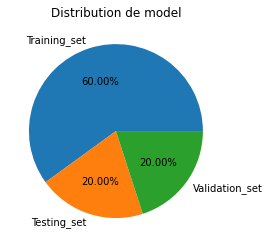

In [ ]:
# model_size = np.array([X_train.count(), X_test.count(), X_val.count()])
model_size = np.array([X_train.count()[0], X_test.count()[0], X_val.count()[0]])

plt.pie(model_size,
        # labels de pie chart
        labels=['Training_set','Testing_set','Validation_set'], 
        # pourcentage
        autopct='%.2f%%', 
       )
plt.title("Distribution de model")
plt.show()

# Bag of words

In [ ]:
"""from sklearn.feature_extraction.text import CountVectorizer"""

'from sklearn.feature_extraction.text import CountVectorizer'

In [ ]:
"""# créer un objet de CountVectorizer
countvectorizer = CountVectorizer()
# countvectorizer = CountVectorizer(min_df=50, max_df=0.95)"""

'# créer un objet de CountVectorizer\ncountvectorizer = CountVectorizer()\n# countvectorizer = CountVectorizer(min_df=50, max_df=0.95)'

In [ ]:
"""# fonction Bag_of_words 
# Entrée : list de tweet
# Sortie : vecteurs de tweet
def bag_of_words(text):
  bag = countvectorizer.fit_transform(text)
  return bag"""

'# fonction Bag_of_words \n# Entrée : list de tweet\n# Sortie : vecteurs de tweet\ndef bag_of_words(text):\n  bag = countvectorizer.fit_transform(text)\n  return bag'

In [ ]:
# un exemple de test
"""exemple = X_train[0]
exemple1 = X_train[10]
exemple2 = X_train[20]

print('exemple : ', exemple)
print('exemple1 : ', exemple1)
print('exemple2 : ', exemple2)


bag = bag_of_words([exemple, exemple1,exemple2])
bag.toarray()
feature_names = countvectorizer.get_feature_names()
pd.DataFrame(bag.toarray(), columns=feature_names)
"""

"exemple = X_train[0]\nexemple1 = X_train[10]\nexemple2 = X_train[20]\n\nprint('exemple : ', exemple)\nprint('exemple1 : ', exemple1)\nprint('exemple2 : ', exemple2)\n\n\nbag = bag_of_words([exemple, exemple1,exemple2])\nbag.toarray()\nfeature_names = countvectorizer.get_feature_names()\npd.DataFrame(bag.toarray(), columns=feature_names)\n"

In [ ]:
"""tweet = np.array(X_train)"""

'tweet = np.array(X_train)'

In [ ]:
"""len(X_train)"""

'len(X_train)'

In [ ]:
"""bag = countvectorizer.fit_transform(tweet)
bag.toarray()"""

'bag = countvectorizer.fit_transform(tweet)\nbag.toarray()'

In [ ]:
"""feature_names = countvectorizer.get_feature_names()
pd.DataFrame(bag.toarray(), columns=feature_names)"""

'feature_names = countvectorizer.get_feature_names()\npd.DataFrame(bag.toarray(), columns=feature_names)'

In [ ]:
"""len(tweet)"""

'len(tweet)'

In [ ]:
"""text = []
for tweet in X_train:
  text.append(tweet)
print(text)

bag = bag_of_words(text)
bag.toarray()"""

'text = []\nfor tweet in X_train:\n  text.append(tweet)\nprint(text)\n\nbag = bag_of_words(text)\nbag.toarray()'

# TF-IDF

In [ ]:
X_train.shape

(432910, 5)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# vectorizer = TfidfVectorizer(min_df=min_df, max_df=0.9)
vectorizer_cleaned = TfidfVectorizer(min_df=min_df, max_df=0.9)
vectorizer_tagged = TfidfVectorizer(min_df=min_df, max_df=0.9)
# X_cleaned = vectorizer.fit_transform(X_train.tolist())
X_cleaned = vectorizer_cleaned.fit_transform(X_train['cleaned'].tolist())
X_tagged = vectorizer_tagged.fit_transform(X_train['tagged'].tolist())

In [ ]:
# print("X_cleaned.shape : ",X_cleaned.shape)
print("X_cleaned.shape : ",X_cleaned.shape,", X_tagged.shape : ",X_tagged.shape)

X_cleaned.shape :  (432910, 30811) , X_tagged.shape :  (432910, 37955)


In [ ]:
featured_names_cleaned = vectorizer_cleaned.get_feature_names()
featured_names_cleaned = vectorizer_tagged.get_feature_names()
print(len(featured_names_cleaned), len(featured_names_cleaned))

37955 37955


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print(f'Feature names \n{featured_names_cleaned}')

Feature names 
['00', '000', '000_det', '000_noun', '000_num', '000_pron', '000_propn', '000_x', '007_num', '00_noun', '00_num', '00_pron', '01', '01_noun', '01_num', '01net_propn', '02', '02_num', '03', '03_noun', '03_num', '04', '04_num', '05', '05_det', '05_noun', '05_num', '05_propn', '06', '06_num', '07', '07_num', '08', '08_num', '08c1w3ouum_propn', '09', '09_noun', '09_num', '0_num', '0_propn', '0b7fce2c1c_propn', '0vo6guwjkd_propn', '10', '100', '10000_num', '1000_num', '1001_num', '100_num', '100_pron', '100_propn', '100e_adj', '101_num', '102_num', '103_num', '104_num', '105_num', '106_num', '107_num', '108_num', '109_num', '10_noun', '10_num', '10_pron', '10_propn', '10e_adj', '10h30_num', '10h35_noun', '10h35_num', '10h35_pron', '10h_noun', '10h_num', '10h_pron', '10pm_num', '10th_x', '10ème_adj', '11', '110_num', '111_num', '112_num', '113_num', '114_num', '115_num', '116_num', '117_num', '118_num', '119_num', '11_det', '11_noun', '11_num', '11_pron', '11_propn', '11e_adj'

In [ ]:
# matrix = X.todense()

J'ai trouvé ce qui saturait la RAM, la matrice sous forme de liste ne sera donc plus enregistrée dans une variable pour libérer de la mémoire vive

In [ ]:
# denseliste = matrix.tolist()

En fait, je ne sais pas si ceci est vraiment utile pour la suite, on ne fait que voir le résultat du TF-IDF sauf que c'est pas très facile à comprendre à l'oeil nu, or c'est la partie qui sature la RAM donc peut-être ça passe si je met df en commentaire.

In [ ]:
# df = pd.DataFrame(denseliste, columns=featured_names)
# df = pd.DataFrame(matrix.tolist(), columns=featured_names)
# df = pd.DataFrame(X.todense().tolist(), columns=featured_names)
# print(f'Final result of TF-IDF \n{df}')
# passer modèle non supervisé pour réduire nb colonne : trucated svd (méthode de clustering) obtenir plutôt 500 colonnes
# df

In [ ]:
print(vectorizer_cleaned.get_feature_names_out())
print('\n')
print(X.shape)

['a1' 'a11' 'a113' ... 'من' 'والروحية' 'وراء']


(721518, 5)


In [ ]:
"""test = 0
for item in featured_names:
  if ((item[0] == '0') or (item[0] == '1') or (item[0] == '2') or (item[0] == '3') or (item[0] == '4') or (item[0] == '5') or (item[0] == '6') or (item[0] == '7') or (item[0] == '8') or (item[0] == '9')):
    test = test + 1
print(test)"""

"test = 0\nfor item in featured_names:\n  if ((item[0] == '0') or (item[0] == '1') or (item[0] == '2') or (item[0] == '3') or (item[0] == '4') or (item[0] == '5') or (item[0] == '6') or (item[0] == '7') or (item[0] == '8') or (item[0] == '9')):\n    test = test + 1\nprint(test)"

# SVM avec TF-IDF

Partie où l'on s'assure que les données ont la bonne forme

In [ ]:
# data.sort_values(by='cleaned').tail(10)

In [ ]:
"""data['cleaned'] = data['cleaned'].apply(lambda x : x.split())"""

"data['cleaned'] = data['cleaned'].apply(lambda x : x.split())"

In [ ]:
"""data.sort_values(by='cleaned').tail(10)"""

"data.sort_values(by='cleaned').tail(10)"

In [ ]:
from sklearn import model_selection, naive_bayes, svm

In [ ]:
"""SVM_Train_X, SVM_Test_X, SVM_Train_Y, SVM_Test_Y = model_selection.train_test_split(data['tweet'],Corpus['liability'],test_size=0.3)"""

"SVM_Train_X, SVM_Test_X, SVM_Train_Y, SVM_Test_Y = model_selection.train_test_split(data['tweet'],Corpus['liability'],test_size=0.3)"

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
"""Encoder = LabelEncoder()
SVM_Train_Y = Encoder.fit_transform(SVM_Train_Y)
SVM_Test_Y = Encoder.fit_transform(SVM_Test_Y)"""

'Encoder = LabelEncoder()\nSVM_Train_Y = Encoder.fit_transform(SVM_Train_Y)\nSVM_Test_Y = Encoder.fit_transform(SVM_Test_Y)'

Apparemment je refais le TF-IDF, à voir si c'est la même chose que j'avais fais et si ce que j'écris actuellement ne sert pas à rien

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
"""SVM_Tfidf_vect = TfidfVectorizer(max_features=5000)
SVM_Tfidf_vect.fit(data['tweet'])

SVM_Train_X_Tfidf = SVM_Tfidf_vect.transform(SVM_Train_X)
SVM_Test_X_Tfidf = SVM_Tfidf_vect.transform(SVM_Test_X)"""

# Train_X_Tfidf = vectorizer.transform(X_train)
Train_X_cleaned_Tfidf = vectorizer_cleaned.transform(X_train['cleaned'])
Train_X_tagged_Tfidf = vectorizer_tagged.transform(X_train['tagged'])
# Test_X_Tfidf = vectorizer.transform(X_test)
Test_X_cleaned_Tfidf = vectorizer_cleaned.transform(X_test['cleaned'])
Test_X_tagged_Tfidf = vectorizer_tagged.transform(X_test['tagged'])

In [ ]:
print("X_train.shape : ",X_train.shape,", X_test.shape : ",X_test.shape)
# print("Train_X_Tfidf.shape : ",Train_X_Tfidf.shape,", Test_X_Tfidf.shape : ",Test_X_Tfidf.shape)
print("Train_X_cleaned_Tfidf.shape : ",Train_X_cleaned_Tfidf.shape,", Test_X_cleaned_Tfidf.shape : ",Test_X_cleaned_Tfidf.shape)
print("Train_X_tagged_Tfidf.shape : ",Train_X_tagged_Tfidf.shape,", Test_X_tagged_Tfidf.shape : ",Test_X_tagged_Tfidf.shape)

X_train.shape :  (432910, 5) , X_test.shape :  (144304, 5)
Train_X_cleaned_Tfidf.shape :  (432910, 30811) , Test_X_cleaned_Tfidf.shape :  (144304, 30811)
Train_X_tagged_Tfidf.shape :  (432910, 37955) , Test_X_tagged_Tfidf.shape :  (144304, 37955)


In [ ]:
type(Train_X_cleaned_Tfidf)

scipy.sparse.csr.csr_matrix

In [ ]:
Train_X_cleaned_Tfidf.get_shape()

(432910, 30811)

In [ ]:
from scipy.sparse import csr_matrix, hstack

In [ ]:
# pd.DataFrame(Train_X_cleaned_Tfidf.toarray())
csr_matrix(X_train[['count_followers', 'rt_per_followers', 'fav_per_followers']].values).get_shape()
# Train_X_cleaned_Tfidf.toarray()

<432910x68769 sparse matrix of type '<class 'numpy.float64'>'
	with 11615916 stored elements in COOrdinate format>

On peut créer un dataframe à partir d'un *scipy.sparse.csr.csr_matrix* cependant le dataframe obtenu peut saturer la RAM.

In [ ]:
Whole_X_Train = hstack((Train_X_cleaned_Tfidf, Train_X_tagged_Tfidf, csr_matrix(X_train[['count_followers', 'rt_per_followers', 'fav_per_followers']].values)))
Whole_X_Test = hstack((Test_X_cleaned_Tfidf, Test_X_tagged_Tfidf, csr_matrix(X_test[['count_followers', 'rt_per_followers', 'fav_per_followers']].values)))

In [ ]:
# Whole_X_Train.get_shape()
# Whole_X_Test.get_shape()
print("Whole_X_Train.get_shape() :",Whole_X_Train.get_shape(), ", Whole_X_Test.get_shape() :",Whole_X_Test.get_shape())

Whole_X_Train.get_shape() : (432910, 68769) , Whole_X_Test.get_shape() : (144304, 68769)


Impossible de créer Whole_X_Train (qui devrait contenir 432 910 lignes et 30 811+37 955+3 colonnes soit 68 769 colonnes pour un total de 29 770 787 790 cases) car ça sature la RAM

In [ ]:
"""print(SVM_Tfidf_vect.vocabulary_)
print(len(SVM_Tfidf_vect.vocabulary_))"""

print(vectorizer_cleaned.vocabulary_)
print(len(vectorizer_cleaned.vocabulary_))

{'rt': 24384, 'associés': 1845, 'invitent': 14355, 'collègues': 5212, 'députés': 9087, 'proposition': 22020, 'loi': 16444, 'visant': 29417, 'pla': 20982, 'violences': 29365, 'conjugales': 5734, 'heureusement': 12884, 'victime': 29233, 'côté': 6823, 'gendarmerie': 11909, 'desident_link': 7416, 'commune': 5385, 'desident_number': 7417, 'ans': 1253, 'raisons': 22902, 'une': 28766, 'révolution': 24881, 'replay': 23701, 'présidentielle': 22298, 'desident_date': 7415, 'lévolution': 16888, 'sondages': 26313, 'tour': 28112, 'finalistes': 10964, 'mort': 18328, 'engagé': 9709, 'pilote': 20888, 'davion': 7148, 'qualifié': 22664, 'lorganisateur': 16518, 'vol': 29540, 'condamné': 5609, 'mois': 18139, 'georgeslouis': 11947, 'bouchez': 3249, 'réduction': 24584, 'émissions': 30485, 'la': 15191, 'décroissance': 8724, 'est': 10078, 'arnaque': 1647, 'nom': 19143, 'refuge': 23333, 'vols': 29570, 'chiens': 4644, 'economie': 9357, 'sida': 25900, 'cacao': 3762, 'refait': 23318, 'ghana': 11974, 'lire': 16294,

In [ ]:
"""print(SVM_Train_X_Tfidf)"""
# print(Train_X_Tfidf)

'print(SVM_Train_X_Tfidf)'

In [ ]:
from sklearn.metrics import accuracy_score

ça c'est pour vérifier à quel point ça prédit bien sans SVM.

J'ai obtenu 74.46666666666667 de précision avec les Train_X et autres du tuto.

J'ai obtenu 73.02499999999999 de précision avec nos X_train et autres.

In [ ]:
"""# fit the training dataset on the NB classifier
Naive = naive_bayes.MultinomialNB()
Naive.fit(SVM_Train_X_Tfidf,SVM_Train_Y)

# predict the labels on validation dataset
predictions_NB = Naive.predict(SVM_Test_X_Tfidf)

# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, SVM_Test_Y)*100)"""

# fit the training dataset on the NB classifier
Naive = naive_bayes.MultinomialNB()
Naive.fit(Whole_X_Train,y_train)

# predict the labels on validation dataset
predictions_NB = Naive.predict(Whole_X_Test)

# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, y_test)*100)

Naive Bayes Accuracy Score ->  55.18627342277414


Tests pour le blocs précédents

Pour *X = data[['cleaned', 'tagged', 'count_followers', 'rt_per_followers', 'fav_per_followers']]* & *y = data[['liability_label']]*

X_train.shape : (432910, 5) , X_test.shape : (144304, 5) , Train_X_Tfidf.shape : (432910, 30811) , Test_X_Tfidf.shape : (5, 30811)

y_train.shape : (432910, 1) , y_test.shape : (144304, 1) predictions_NB.shape : (5,)

Pour *X = data['cleaned']* & *y = data['liability_label']*

X_train.shape : (432910,) , X_test.shape : (144304,) , Train_X_Tfidf.shape : (432910, 30811) , Test_X_Tfidf.shape : (144304, 30811)

y_train.shape : (432910,) , y_test.shape : (144304,) predictions_NB.shape : (144304,)

In [ ]:
print("X_train.shape :",X_train.shape, ", X_test.shape :",X_test.shape, ", Train_X_Tfidf.shape :",Whole_X_Train.shape, ", Test_X_Tfidf.shape :",Whole_X_Test.shape)
print("y_train.shape :",y_train.shape, ", y_test.shape :",y_test.shape, "predictions_NB.shape :", predictions_NB.shape)

X_train.shape : (432910, 5) , X_test.shape : (144304, 5) , Train_X_Tfidf.shape : (432910, 68769) , Test_X_Tfidf.shape : (144304, 68769)
y_train.shape : (432910,) , y_test.shape : (144304,) predictions_NB.shape : (144304,)


Et là on prédit avec le SVM.

J'ai obtenu 75.78333333333333 de précision avec les Train_X et autres du tuto.

J'ai obtenu 73.125 de précision avec nos X_train et autres.

In [ ]:
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import make_scorer
mcc_scorer = make_scorer(matthews_corrcoef)

In [ ]:
"""# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(SVM_Train_X_Tfidf,SVM_Train_Y)# predict the labels on validation dataset
predictions_SVM = SVM.predict(SVM_Test_X_Tfidf)# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, SVM_Test_Y)*100)"""

from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform

logistic = LogisticRegression(solver='liblinear', tol=1e-2, max_iter=200, random_state=42)
distributions = dict(C=uniform(loc=0, scale=4), penalty=['l2', 'l1'], class_weight=['balanced', None])

# randomized_searchCV

# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
# SVM = svm.SVC(C=1.0, degree=2, gamma='auto', random_state=42, class_weight='balanced')
SVM = RandomizedSearchCV(logistic, distributions, scoring=mcc_scorer, random_state=42, verbose=1)

SVM.fit(Whole_X_Train,y_train)# predict the labels on validation dataset
predictions_SVM_train = SVM.predict(Whole_X_Train)# Use accuracy_score function to get the accuracy
predictions_SVM_test = SVM.predict(Whole_X_Test)# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score Train -> ",accuracy_score(predictions_SVM_train, y_train)*100)
print("SVM Accuracy Score Test -> ",accuracy_score(predictions_SVM_test, y_test)*100)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
SVM Accuracy Score Train ->  88.27885703725947
SVM Accuracy Score Test ->  84.1965572679898


In [ ]:
predictions_SVM_train

array(['site plutôt douteux', 'site plutôt fiable', 'site plutôt douteux',
       ..., 'site plutôt fiable', 'site plutôt fiable',
       'site plutôt fiable'], dtype=object)

Matrices de confusion : pour le données d'entrainement

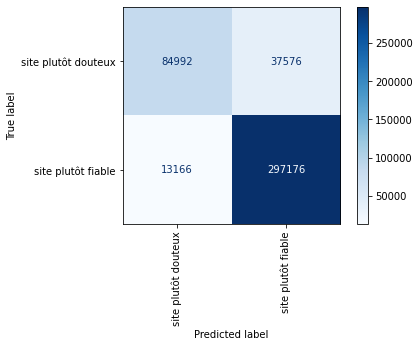

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report


#matrice de confusion
#confrontation entre Y obs. sur l’éch. test et la prédiction
# predictions = best_rd_model.predict(df_test)

cm = confusion_matrix(y_train, 
                      predictions_SVM_train, 
                      labels=SVM.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=SVM.classes_)
disp.plot(cmap=plt.cm.Blues,values_format='g',xticks_rotation='vertical')
plt.show()


Matrices de confusion : pour le données de test

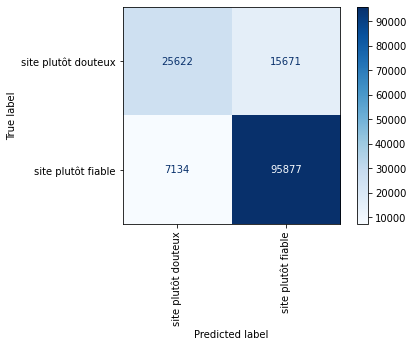

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report


#matrice de confusion
#confrontation entre Y obs. sur l’éch. test et la prédiction
# predictions = best_rd_model.predict(df_test)

cm = confusion_matrix(y_test, 
                      predictions_SVM_test, 
                      labels=SVM.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=SVM.classes_)
disp.plot(cmap=plt.cm.Blues,values_format='g',xticks_rotation='vertical')
plt.show()


In [ ]:
"""prediction_overfitting = SVM.predict(Train_X_Tfidf)
accuracy = accuracy_score(prediction_overfitting, y_train)
print(accuracy*100)"""

In [ ]:
matthews_corrcoef(y_train, predictions_SVM_train)

0.7004344231523629

In [ ]:
matthews_corrcoef(y_test, predictions_SVM_test)

0.5947613176057386

In [ ]:
from sklearn.metrics import classification_report
print("donnée de train")
print(classification_report(y_train, predictions_SVM_train))
print("donnée de test")
print(classification_report(y_test, predictions_SVM_test))

donnée de train
                     precision    recall  f1-score   support

site plutôt douteux       0.87      0.69      0.77    122568
 site plutôt fiable       0.89      0.96      0.92    310342

           accuracy                           0.88    432910
          macro avg       0.88      0.83      0.85    432910
       weighted avg       0.88      0.88      0.88    432910

donnée de test
                     precision    recall  f1-score   support

site plutôt douteux       0.78      0.62      0.69     41293
 site plutôt fiable       0.86      0.93      0.89    103011

           accuracy                           0.84    144304
          macro avg       0.82      0.78      0.79    144304
       weighted avg       0.84      0.84      0.84    144304



Tenter de rajouter le postagging pour chaque mot (ça dit si un mot est un verbe, adjectif, adverbe, ...)

Tester avec lemmatization

Plus tard on utilisera peut-être LIME pour voir ce qui se passe



In [ ]:
predictions_SVM_train

Permet de vérifier le nombre de degré nécessaire pour le modèle SVM (on trouve 2)

In [ ]:
"""Acc_test = []
Acc_train = []
for i in range(3):
  model=svm.SVC(kernel='poly', degree=i, C=100)
  model.fit(Train_X_Tfidf, y_train)
  Acc_test.append(model.score(Test_X_Tfidf, y_test))
  Acc_train.append(model.score(Train_X_Tfidf, y_train))
  print("Boucle n°",i+1)"""

In [ ]:
"""plt.plot(Acc_train,'-o')
plt.plot(Acc_test,'-o')
plt.ylim(0, 1) #trouvé le code pour choisir la taille
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','test'])
plt.title('Train vs Valid Accuracy')
# plt.savefig(res_folder+'/acc.png')
plt.show()"""

In [ ]:
# pd.DataFrame(predictions_SVM)
results_test = pd.DataFrame(X_test).reset_index()
results_test['predictions_test'] = predictions_SVM_test
results_test

,index,cleaned,tagged,count_followers,rt_per_followers,fav_per_followers,predictions_test
0,135077,desident_number linstant culottées linterview...,21h_NOUN ._PUNCT L'_DET Instant_NOUN des_DET C...,3717.0,0.000000,0.000000,site plutôt fiable
1,646264,desident_number desident_date desident_date ’a...,15_NUM août_NOUN 2021_NUM :_PUNCT l’_DET abbé_...,5221.0,0.004022,0.007661,site plutôt douteux
2,438656,trans musicales rennes limitent réservations d...,Les_DET Trans_NOUN Musicales_ADJ de_ADP Rennes...,1941371.0,0.000004,0.000005,site plutôt fiable
3,167409,audiences fabrice luchini battu tom hardy desi...,Audiences_NOUN :_PUNCT Fabrice_PROPN Luchini_P...,68910.0,0.000015,0.000029,site plutôt fiable
4,351107,georges brassens tuyaux lorgue cathédrale bour...,Georges_PROPN Brassens_PROPN dans_ADP les_DET ...,14859.0,0.000000,0.000067,site plutôt fiable
...,...,...,...,...,...,...,...
144299,493260,rt desident_number points décryptage,RT_X @GallantNicolas1_PROPN :_PUNCT Le_DET #_P...,43786.0,0.000069,0.000000,site plutôt fiable
144300,439305,vidéo ▶️ grève guadeloupe lobligation vaccinal...,VIDÉO_NOUN ▶_PROPN ️_X _SPACE Grève_ADJ en_AD...,1941371.0,0.000004,0.000007,site plutôt fiable
144301,344191,desident_number ans rêve travailler recaler ca...,".@RaphalYem_PUNCT a_VERB 18_NUM ans_NOUN ,_PUN...",53835.0,0.000000,0.000000,site plutôt fiable
144302,328185,rapport annuel dimpact coulisses journal centr...,Rapport_NOUN annuel_ADJ d'_ADP impact_NOUN :_P...,9640.0,0.000000,0.000000,site plutôt fiable


In [ ]:
# pd.DataFrame(predictions_SVM)
results_train = pd.DataFrame(X_train).reset_index()
results_train['predictions_train'] = predictions_SVM_train
results_train

,index,cleaned,tagged,count_followers,rt_per_followers,fav_per_followers,predictions_train
0,630700,rt associés invitent collègues députés cosigne...,RT_NOUN @franckmarlin_PROPN :_PUNCT [_PUNCT #_...,11918.0,0.000503,0.000000,site plutôt douteux
1,328981,violences conjugales heureusement victime habi...,Violences_NOUN conjugales_ADJ :_PUNCT heureuse...,9640.0,0.000000,0.000104,site plutôt fiable
2,633243,commune desident_number ans desident_number ra...,"La_DET Commune_NOUN ,_PUNCT 150_NUM ans_NOUN a...",24070.0,0.000083,0.000125,site plutôt douteux
3,323572,présidentielle desident_date lévolution sondag...,Présidentielle_NOUN 2022_NUM :_PUNCT voici_VER...,426668.0,0.000005,0.000007,site plutôt fiable
4,393725,🔴mort engagé pilote davion qualifié lorganisa...,🔴_PROPN Mort_VERB d'#Emiliano_PROPN #_NOUN Sal...,31025.0,0.000032,0.000000,site plutôt fiable
...,...,...,...,...,...,...,...
432905,300301,vallée rhône patrouilleurs risquent vie ramass...,Vallée_NOUN du_DET Rhône|_NOUN Ces_DET patroui...,167663.0,0.000036,0.000060,site plutôt fiable
432906,659700,mal terminer macron desident_number millions f...,Ça_PRON va_VERB très_ADV mal_ADV se_PRON termi...,27858.0,0.000359,0.001149,site plutôt douteux
432907,206250,🧠 question jour créativité voitelle cerveau de...,🧠_PROPN Question_NOUN du_DET jour_NOUN :_PUNCT...,74147.0,0.000216,0.000283,site plutôt fiable
432908,516972,egypte lac nasser contrôle nil ans création la...,"En_ADP Egypte_PROPN ,_PUNCT le_DET lac_PROPN N...",1309550.0,0.000000,0.000006,site plutôt fiable


In [ ]:
# Je ne sais plus pourquoi c'est là
"""for index in results_test['index']:
  print(index, " is at position ", i)"""

In [ ]:
data

# Glove

Pour tester le glove on peut utiliser un t-SNE

In [ ]:
!wget http://nlp.stanford.edu/data/glove.twitter.27B.zip

In [ ]:
!unzip glove*.zip

In [ ]:
print('Indexing word vectors.')

embeddings_index = {}
f = open('glove.6B.100d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

In [ ]:
embeddings_index = {}
with open('glove.6B.100d.txt', encoding='utf-8') as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))

In [ ]:
word_index = dict(zip(featured_names, range(len(featured_names))))

In [ ]:
word_index

In [ ]:
num_tokens = len(featured_names) + 2
embedding_dim = 100
hits = 0
misses = 0

# Prepare embedding matrix
embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1
        print("était "+word)
print("Converted %d words (%d misses)" % (hits, misses))


In [ ]:
! pip install glove-python-binary

In [ ]:
import glove
glove_corpus = glove.Corpus()

corpus_sentences = [ 
        [ w.lower() for w in next(corpus_sentence_tokens_gen)] # All lower-case
        for _ in range(0,100*1000) 
    ]

# Fit the co-occurrence matrix using a sliding window of 10 words.
glove_corpus.fit(corpus_sentences, window=10)

print("Dictionary length=%d" % (len(glove_corpus.dictionary),))

#A faire

Les trucs envoyés sur Facebook

tester word2vec (et glove aussi)

enlever caratères tout seul, enlever les gt (greater then)

Faire un excel qui compare les méthodes

Si les modèles changent pas les résultats alors améliorer en ammont (spacy?)

Penser à faire sur TOUS les tweets

Pour cette partie du mail : "Essayer de rajouter les variables nombre de retweets, nombre de likes en features ;"

Dans colone transfomer on applique le TF-IDF sur variable que je veux, on garde les autres variables